<a href="https://colab.research.google.com/github/kamat-v/HF_Transformers_Notebooks/blob/main/Pipeline_Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/abstracts_small.csv
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

In [ ]:
!pip install transformers

In [3]:
import numpy as np
import pandas as pd
from transformers import pipeline

In [ ]:
featurizer = pipeline('feature-extraction', model='bert-base-uncased', device=0)

In [5]:
df=pd.read_csv('bbc_text_cls.csv')

In [6]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [7]:
df.shape

(2225, 2)

In [8]:
result=featurizer(''.join(df.iloc[0].text.split()[:250]))

In [9]:
type(result)

list

In [10]:
len(result)

1

In [11]:
type(result[0])

list

In [12]:
type(result[0][0])

list

In [13]:
result[0][0][0]

-0.31610849499702454

In [14]:
r_np=np.array(result)

In [15]:
r_np.shape

(1, 467, 768)

In [16]:
results=featurizer([''.join(text.split()[:250]) for text in df.iloc[:5].text])

In [17]:
len(results)

5

In [18]:
np.array(results[0]).shape

(1, 467, 768)

In [19]:
np.array(results[1]).shape

(1, 370, 768)

In [20]:
np.array(results[2]).shape

(1, 352, 768)

In [21]:
len(df.iloc[0].text.split())

421

In [22]:
len(df.iloc[1].text.split())

384

In [23]:
len(df.iloc[2].text.split())

264

In [24]:
lens=[len(a.split()) for a in df.text]

In [25]:
lens

[421,
 384,
 264,
 406,
 265,
 184,
 284,
 321,
 229,
 227,
 185,
 300,
 299,
 466,
 606,
 247,
 213,
 175,
 270,
 658,
 350,
 306,
 208,
 328,
 455,
 297,
 274,
 211,
 403,
 415,
 304,
 278,
 226,
 308,
 199,
 349,
 419,
 153,
 210,
 229,
 328,
 228,
 193,
 404,
 311,
 293,
 274,
 265,
 617,
 308,
 295,
 484,
 236,
 254,
 365,
 262,
 440,
 198,
 294,
 143,
 266,
 319,
 289,
 291,
 355,
 319,
 294,
 389,
 536,
 184,
 206,
 278,
 253,
 254,
 214,
 282,
 443,
 260,
 250,
 191,
 265,
 207,
 534,
 210,
 228,
 191,
 294,
 194,
 376,
 377,
 314,
 361,
 315,
 210,
 264,
 140,
 444,
 217,
 430,
 342,
 352,
 227,
 478,
 369,
 227,
 305,
 295,
 171,
 149,
 269,
 527,
 287,
 370,
 351,
 203,
 235,
 420,
 221,
 456,
 302,
 520,
 386,
 191,
 171,
 242,
 371,
 481,
 303,
 162,
 422,
 446,
 216,
 281,
 364,
 404,
 535,
 219,
 313,
 307,
 442,
 260,
 339,
 263,
 159,
 252,
 875,
 209,
 259,
 595,
 365,
 287,
 332,
 400,
 360,
 268,
 284,
 271,
 160,
 634,
 387,
 366,
 291,
 441,
 414,
 363,
 264,
 213

np.int64(4432)

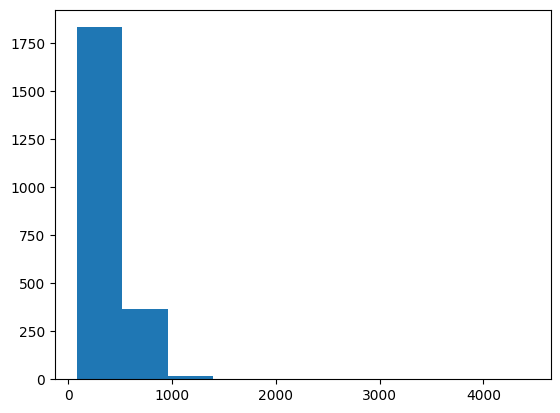

In [26]:
import matplotlib.pyplot as plt
plt.hist(lens)
np.max(lens)

In [27]:
texts=[''.join(a.split()[:100]) for a in df.text]

In [28]:
import torch
torch.cuda.is_available()

True

In [29]:
def batch_encode(texts, batch_size=32):
    all_embeddings = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i + batch_size]
        outputs = featurizer(batch)  # list of [seq_len x hidden_dim]

        # For each output (per text), get [CLS] token only (i.e., outputs[0][0])
        batch_embeddings = [torch.tensor(out[0]).numpy() for out in outputs]
        all_embeddings.extend(batch_embeddings)
    return all_embeddings

In [42]:
embeddings = batch_encode(texts, batch_size=32)

In [47]:
embeds=[e[0] for e in embeddings]

In [48]:
embed_array=np.array(embeds)

In [49]:
embed_array.shape

(2225, 768)

In [50]:
from sklearn.neighbors import NearestNeighbors

In [51]:
model=NearestNeighbors(metric='cosine')
model.fit(embed_array)

NearestNeighbors(metric='cosine')

![](https://deeplearningcourses.com/notebooks_v3_pxl?sc=8Jty5lhP77FmKx1Scgr7YA&n=Pipeline+Feature+Extraction)

In [56]:
distances, indices = model.kneighbors(embed_array[10].reshape(1,-1))

In [57]:
distances

array([[1.1920929e-07, 1.5981972e-02, 1.9973278e-02, 2.0853639e-02,
        2.1100104e-02]], dtype=float32)

In [58]:
indices

array([[  10,  875,  349,  241, 1481]])

In [59]:
df.iloc[10].text

"Ask Jeeves tips online ad revival\n\nAsk Jeeves has become the third leading online search firm this week to thank a revival in internet advertising for improving fortunes.\n\nThe firm's revenue nearly tripled in the fourth quarter of 2004, exceeding $86m (£46m). Ask Jeeves, once among the best-known names on the web, is now a relatively modest player. Its $17m profit for the quarter was dwarfed by the $204m announced by rival Google earlier in the week. During the same quarter, Yahoo earned $187m, again tipping a resurgence in online advertising.\n\nThe trend has taken hold relatively quickly. Late last year, marketing company Doubleclick, one of the leading providers of online advertising, warned that some or all of its business would have to be put up for sale. But on Thursday, it announced that a sharp turnaround had brought about an unexpected increase in profits. Neither Ask Jeeves nor Doubleclick thrilled investors with their profit news, however. In both cases, their shares fe

In [61]:
df.iloc[10].labels

'business'

In [62]:
df.iloc[0].text

'Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sig

In [63]:
df.iloc[273].text

"Google shares fall as staff sell\n\nShares in Google have fallen 6.7% after employees and early investors in the web search took advantage of the first chance to sell their holdings.\n\nRestrictions were imposed ahead of its flotation in August, to prevent shares being dumped quickly onto the market. In one of the most closely-watched initial public offerings in stock market history, the US-based company sold 19.6 million shares at $85 each. Google shares have risen since but fell $12.33 on Tuesday to close at $172.55. The restriction - known as a lockup - is being eased piecemeal: in all, some 227 million additional shares will become free to trade by February 2005. Selling the shares could turn many of Google's workers into millionaires.\n\nThere were fears that the potential increase of shares in circulation from Tuesday would ease demand for stock. However, analysts say they expected most shareholders would be holding back from selling all their shares immediately, as Google's goo

In [64]:
query=featurizer("TV and film")

In [65]:
len(query)

1

In [67]:
len(query[0]),len(query[0][0])

(5, 768)

In [69]:
distances, indices = model.kneighbors(np.array(query[0][0]).reshape(1,-1))

In [70]:
distances, indices

(array([[0.22829721, 0.23178653, 0.23508113, 0.23631721, 0.23634393]]),
 array([[1394, 1426,  695, 2027,  645]]))

In [77]:
df.iloc[1394].text

'Greek duo cleared in doping case\n\nSprinters Kostas Kenteris and Katerina Thanou have been cleared of doping offences by an independent tribunal.\n\nThe duo had been provisionally suspended by the IAAF for allegedly missing three drugs tests, including one on the eve of the Athens Olympics. But the Greek Athletics Federation tribunal has overturned the bans - a decision which the IAAF can now contest at the Court of Arbitration for Sport. The pair\'s former coach, Christos Tzekos, has been banned for four years. Kenteris, 31, and Thanou, 30, had been charged with avoiding drug tests in Tel Aviv, Chicago and Athens and failing to notify anti-doping officials of their whereabouts before the Olympics. They withdrew from the Olympics after missing a drugs test at the Olympic Village on 12 August.\n\nThe pair then spent four days in a hospital, claiming they had been injured in a motorcycle crash. It was the International Olympic Committee\'s demand that the IAAF investigate the affair th